In [ ]:
1. Loading and Preprocessing (1 marks)
Load the Iris dataset from sklearn.
Drop the species column since this is a clustering problem.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Drop the species column (target values)
data_no_labels = data.copy()

# Display the first few rows of the dataset
print("Dataset without labels:")
print(data_no_labels.head())



Dataset without labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
2.Clustering Algorithm Implementation (8 marks)
Implement the following two clustering algorithms:

 
A) KMeans Clustering (4 marks)
Provide a brief description of how KMeans clustering works.
Explain why KMeans clustering might be suitable for the Iris dataset.
Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.
    
B) Hierarchical Clustering (4 marks)
Provide a brief description of how Hierarchical clustering works.
Explain why Hierarchical clustering might be suitable for the Iris dataset.
Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.

In [ ]:
#  A)
1. Brief Description of KMeans Clustering
KMeans clustering divides data into 
K
K clusters by minimizing the within-cluster sum of squares (WCSS).
The algorithm initializes 
K
K centroids randomly, assigns data points to the nearest centroid, and iteratively updates centroids until convergence.
2. Why KMeans is Suitable for Iris Dataset
The Iris dataset is small and well-separated, making KMeans a practical choice for clustering.
The low dimensionality (4 features) allows efficient computation.

C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

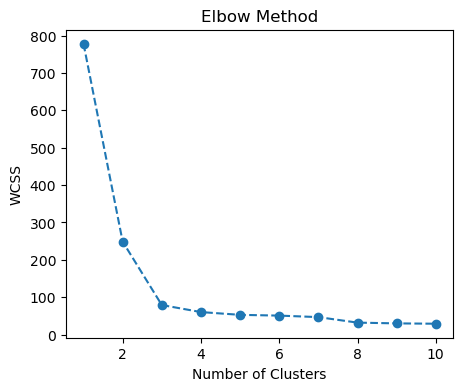

C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


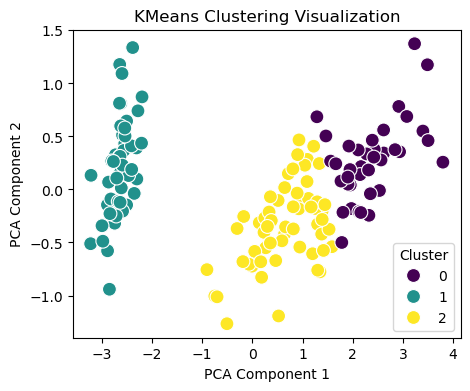

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_no_labels)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(5, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_no_labels)

# Add cluster labels to the dataset
data_no_labels['Cluster'] = clusters

# Visualize the clusters using PCA (2D plot)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_no_labels.iloc[:, :-1])

plt.figure(figsize=(5, 4))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title("KMeans Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
b)1. Brief Description of Hierarchical Clustering
Hierarchical clustering builds a tree-like structure of clusters (dendrogram).
Agglomerative clustering starts with individual points and merges them iteratively based on similarity.

In [ ]:
2. Why Hierarchical Clustering is Suitable for Iris Dataset
It captures the natural grouping in the dataset without needing to specify the number of clusters explicitly.
The dendrogram provides a clear view of the hierarchy.

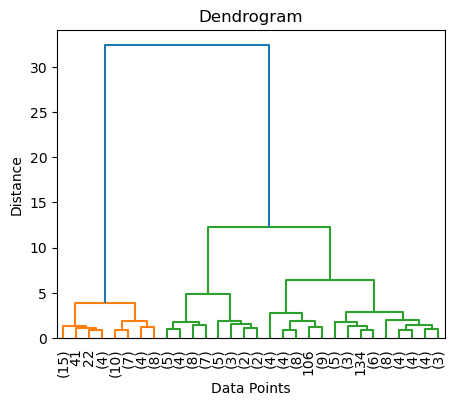

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate the linkage matrix
linkage_matrix = linkage(data_no_labels.iloc[:, :-1], method='ward')

# Plot the dendrogram
plt.figure(figsize=(5, 4))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
h_clusters = hierarchical.fit_predict(data_no_labels.iloc[:, :-1])

# Add cluster labels to the dataset
data_no_labels['H_Cluster'] = h_clusters

# Visualize the clusters using PCA (2D plot)
plt.figure(figsize=(5, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=h_clusters, palette='viridis', s=100)
plt.title("Hierarchical Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()
